# Using different models in Scikit-Learn

Models:
- SVM
- Desicion Tree
    - Binary Tree
    - Random Forest
    - Boosted Tree
- KNN
- Naive Bayes
- ...

https://scikit-learn.org/stable/ provides six classes of tasks, with a list of useful applications and algorithms in each class.

### How to use Sklearn

Again, remember these 5 steps:

1. Choose a class of model and import it from sklearn.
1. Choose model hyperparameters by instantiating this class with desired values.
1. Arrange data into a features matrix (x or x matrix) and target vector (y).
1. Fit the model to your data by calling **fit()**.
1. Apply the model to your "new" data using **predict()**.

**New Task: Classify "Phase" (solid, liquid, or gas) using "MeltingPoint" and "BoilingPoint" in the periodic table**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
Elements = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')

In [3]:
Elements.keys()

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

Use descriptive statistics to understand the data

<AxesSubplot:>

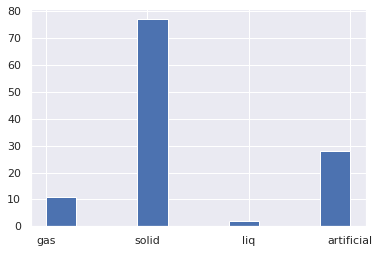

In [4]:
Elements['Phase'].hist()

Remove artificial elements

In [5]:
Elements_slg = Elements.loc[Elements['Phase'] != 'artificial']

Data visualization

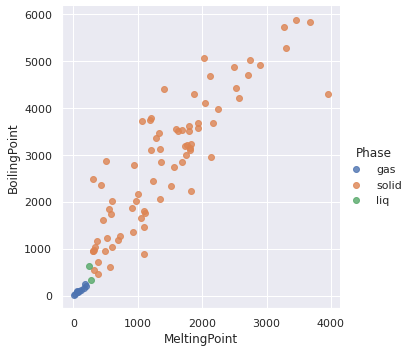

In [6]:
# sns.lmplot("MeltingPoint", "BoilingPoint", hue="Phase", data = Elements_slg, fit_reg = False); # Explicit x y seaborn updates 2022
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_slg, fit_reg = False);
# hue refers to the color of the phase

Remove He (no MeltingPoint)

In [7]:
Elements_slg[['MeltingPoint', 'BoilingPoint']].head()

,MeltingPoint,BoilingPoint
0,14.175,20.28
1,NaN,4.22
2,453.850,1615.00
3,1560.150,2742.00
4,2573.150,4200.00


In [8]:
Elements_slg_new = Elements_slg.drop([1])
Elements_slg_new.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.00009,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.53400,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.85000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.34000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
5,6,Carbon,C,12.011,6,6,6,2,14.0,solid,...,11.2603,2.27000,3948.150,4300.00,7.0,Prehistoric,NaN,0.709,2,4.0


In [12]:
from sklearn import svm
clf = svm.SVC() # Step2 hyperparameter
clf.fit(Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase'])  # keep in mind what data you are using, don't get it wrong.

SVC()

In [14]:
clf.predict([[200, 500]])  # wrong prediction, this temperature pair should be 'liquid'.

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['gas'], dtype=object)

In [7]:
Elements_slg_new = Elements_slg.drop([1])

Try the first method listed under Classification in https://scikit-learn.org/stable/ 

In [15]:
from sklearn import svm
clf = svm.SVC()
#clf.fit(Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase']) data framename removal updates 2022
clf.fit(Elements_slg_new[["MeltingPoint", "BoilingPoint"]].values, Elements_slg_new['Phase'])

SVC()

Try a "virtual" element with MeltingPoint = 1000 K and BoilingPoint = 2000 K

In [16]:
clf.predict([[1000, 2000]])

array(['solid'], dtype=object)

Plot predicted results with MeltingPoint and BoilingPoint ranging from 0 - 4000 K

In [20]:
xx_1, xx_2 = np.meshgrid(x_m, x_b)
xx_1
xx_2

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [  10.,   10.,   10., ...,   10.,   10.,   10.],
       [  20.,   20.,   20., ...,   20.,   20.,   20.],
       ...,
       [3980., 3980., 3980., ..., 3980., 3980., 3980.],
       [3990., 3990., 3990., ..., 3990., 3990., 3990.],
       [4000., 4000., 4000., ..., 4000., 4000., 4000.]])

In [22]:
xx = np.concatenate((xx_1.ravel().reshape(-1,1), xx_2.ravel().reshape(-1,1)), axis=1)
xx
y = clf.predict(xx)
y

array(['gas', 'gas', 'gas', ..., 'solid', 'solid', 'solid'], dtype=object)

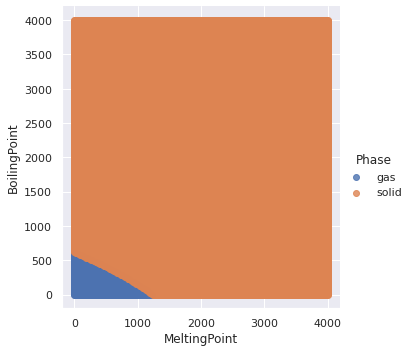

In [17]:
# array of melting point 
x_m = np.linspace(0, 4000, 401)
# array of boiling point
x_b = np.linspace(0, 4000, 401)
# Get 2D mesh of x_m and x_b
xx_1, xx_2 = np.meshgrid(x_m, x_b)
# flatten the 2D array to plot decision boundary
xx = np.concatenate((xx_1.ravel().reshape(-1,1), xx_2.ravel().reshape(-1,1)), axis=1)
# predict
y = clf.predict(xx)
# plot the result
Elements_predit = pd.DataFrame(data=np.concatenate((xx, y.reshape(-1,1)), axis=1), columns=["MeltingPoint", "BoilingPoint", "Phase"])
# sns.lmplot("MeltingPoint", "BoilingPoint", hue="Phase", data = Elements_predit, fit_reg = False); Explicit x y seaborn updates 2022
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_predit, fit_reg = False);
# does the predicted result look satisfactory?

**Using other methods to classify "Phase" (solid, liquid, or gas) using "MeltingPoint" and "BoilingPoint" in the periodic table**

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html